<a href="https://colab.research.google.com/github/anaramos5582/bootcamp-womakerscode/blob/main/Notebook_Desafio4_Futebol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Womakers Code - Bootcamp Data Analytics 2024 - Desafio Python Pandas 4
#### Elaborado por Ana Paula Barros Ramos para integração como parte de um desafio em grupo.


## Pré-Requisitos

Definição do problema: Dado que você está trabalhando numa emissora de televisão, o narrador precisa informar o jogo com o maior
número de gols na história da Bundesliga (Campeonato Alemão).

Você precisa fazer uma busca em todos os jogos da história deste campeonato e verificar qual jogo é esse e passar a informação ao narrador, para posteriormente, o narrador informar aos telespectadores.

1. Verificar os jogos com maior quantidade de gols na história da Bundesliga
2. Informar a data, os times participantes e o placar do jogo

## Sobre a Fonte de Dados
A Bundesliga é a primeira liga de futebol profissional da Alemanha. É considerada a principal competição desportiva do país.

## Instalando e Carregando os Pacotes

In [ ]:
# Versão do Python
from platform import python_version
print (python_version())

3.9.13


In [ ]:
# Intalando novos pacotes
!pip install pydataset
from pydataset import data

In [ ]:
#Importando as bibliotecas

# Manipulação de Dados
import pandas as pd
import numpy as np
#import pydataset as data

# Datas
from datetime import datetime, timedelta

# Visualizações
from matplotlib import pyplot as plt
import seaborn as sns

### 1. Análise Exploratória e Engenharia de Atributos

In [ ]:
# Carregando o Dataset com o código indicado em entre ''
df_futebol = data('Bundesliga')

In [ ]:
# Função que retorna o número de linhas e colunas em um DataFrame
def func_retorna_linhas_colunas(df):
    #return df.shape[0]
     print ("Esse DataFrame possui",df.shape[0],"linhas e", df.shape[1], "colunas.")

In [ ]:
func_retorna_linhas_colunas(df_futebol)

Esse DataFrame possui 14018 linhas e 7 colunas.


In [ ]:
# O primeiro jogo da Bundesliga foi em 24 de agosto de 1963.
df_futebol.sort_values('Date').head(10)

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date
1,Werder Bremen,Borussia Dortmund,3,2,1,1963,1963-08-24 09:30:00
2,Hertha BSC Berlin,1. FC Nuernberg,1,1,1,1963,1963-08-24 09:30:00
3,Preussen Muenster,Hamburger SV,1,1,1,1963,1963-08-24 09:30:00
4,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1,1963,1963-08-24 09:30:00
5,Karlsruher SC,Meidericher SV,1,4,1,1963,1963-08-24 09:30:00
6,1. FC Saarbruecken,1. FC Koeln,0,2,1,1963,1963-08-24 09:30:00
7,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1,1963,1963-08-24 09:30:00
8,Schalke 04,VfB Stuttgart,2,0,1,1963,1963-08-24 09:30:00
16,VfB Stuttgart,Hertha BSC Berlin,2,0,2,1963,1963-08-31 09:30:00
15,Eintracht Braunschweig,Preussen Muenster,1,0,2,1963,1963-08-31 09:30:00


In [ ]:
# Analisando os tipos de variáveis
df_futebol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14018 entries, 1 to 14018
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HomeTeam   14018 non-null  object
 1   AwayTeam   14018 non-null  object
 2   HomeGoals  14018 non-null  int64 
 3   AwayGoals  14018 non-null  int64 
 4   Round      14018 non-null  int64 
 5   Year       14018 non-null  int64 
 6   Date       14016 non-null  object
dtypes: int64(4), object(3)
memory usage: 876.1+ KB


In [ ]:
# Transformando a variável Date para o tipo Date
df_futebol['Date'] = pd.to_datetime(df_futebol['Date'])

In [ ]:
df_futebol['Month'] = df_futebol['Date'].dt.month_name()

In [ ]:
# Criando a coluna Hora/Time
df_futebol['Time'] = df_futebol['Date'].dt.time

In [ ]:
# Separando a coluna Date de Time
df_futebol['Date'] = df_futebol['Date'].dt.date

In [ ]:
df_futebol['TotalGoals'] = df_futebol['HomeGoals'] + df_futebol['AwayGoals']

In [ ]:
df_futebol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14018 entries, 1 to 14018
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HomeTeam    14018 non-null  object
 1   AwayTeam    14018 non-null  object
 2   HomeGoals   14018 non-null  int64 
 3   AwayGoals   14018 non-null  int64 
 4   Round       14018 non-null  int64 
 5   Year        14018 non-null  int64 
 6   Date        14016 non-null  object
 7   Month       14016 non-null  object
 8   Time        14016 non-null  object
 9   TotalGoals  14018 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.2+ MB


In [ ]:
df_futebol.isna().any()

HomeTeam      False
AwayTeam      False
HomeGoals     False
AwayGoals     False
Round         False
Year          False
Date           True
Month          True
Time           True
TotalGoals    False
dtype: bool

In [ ]:
df_futebol.isna().sum()

HomeTeam      0
AwayTeam      0
HomeGoals     0
AwayGoals     0
Round         0
Year          0
Date          2
Month         2
Time          2
TotalGoals    0
dtype: int64

In [ ]:
df_futebol.columns

Index(['HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals', 'Round', 'Year', 'Date', 'Month', 'Time',
       'TotalGoals'],
      dtype='object')

In [ ]:
df_futebol.tail(10)

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,Month,Time,TotalGoals
14009,Hamburger SV,1. FC Koeln,0,1,33,2008,2009-05-16,May,09:30:00,1
14010,VfL Wolfsburg,Werder Bremen,5,1,34,2008,2009-05-23,May,09:30:00,6
14011,Eintracht Frankfurt,Hamburger SV,2,3,34,2008,2009-05-23,May,09:30:00,5
14012,Bayern Muenchen,VfB Stuttgart,2,1,34,2008,2009-05-23,May,09:30:00,3
14013,Energie Cottbus,Bayer Leverkusen,3,0,34,2008,2009-05-23,May,09:30:00,3
14014,Arminia Bielefeld,Hannover 96,2,2,34,2008,2009-05-23,May,09:30:00,4
14015,Karlsruher SC,Hertha BSC Berlin,4,0,34,2008,2009-05-23,May,09:30:00,4
14016,1. FC Koeln,VfL Bochum,1,1,34,2008,2009-05-23,May,09:30:00,2
14017,Borussia Moenchengladbach,Borussia Dortmund,1,1,34,2008,2009-05-23,May,09:30:00,2
14018,Schalke 04,1899 Hoffenheim,2,3,34,2008,2009-05-23,May,09:30:00,5


In [ ]:
# Verificando valores únicos de cada coluna
# Caso a lista de valores únicos da referida coluna seja <= 30 imprime a lista, caso contrário imprime o
# quantitativo de valores.

def func_colunas_valores_unicos(df):
    for col in list(df.columns):
        valores_unicos = df[col].unique()

        if len(valores_unicos) <= 30:
            print("\n" + col + ': ' + str(len(valores_unicos)) + ' valor(es) único(s).')
            print(valores_unicos)
        else:
            print("\n" + col + ': ' + str(len(valores_unicos)) + ' valor(es) único(s).')

In [ ]:
# Chamada a função que indica os valores únicos de cada coluna, de modo a analisar a eventual existência de dados indesejados
func_colunas_valores_unicos(df_futebol)


HomeTeam: 52 valor(es) único(s).

AwayTeam: 52 valor(es) único(s).

HomeGoals: 13 valor(es) único(s).

[ 3  1  0  2  4  5  7  9  6  8 11 10 12]

AwayGoals: 10 valor(es) único(s).

[2 1 4 0 3 5 7 6 9 8]

Round: 38 valor(es) único(s).

Year: 46 valor(es) único(s).

Date: 3300 valor(es) único(s).

Month: 13 valor(es) único(s).

['August' 'September' 'October' 'November' 'December' 'January' 'February'
 'March' 'April' 'May' 'June' 'July' nan]

Time: 26 valor(es) único(s).

[datetime.time(9, 30) datetime.time(14, 0) datetime.time(14, 30)
 datetime.time(10, 30) datetime.time(15, 0) datetime.time(13, 30)
 datetime.time(12, 0) datetime.time(8, 30) datetime.time(8, 0)
 datetime.time(13, 0) datetime.time(12, 30) datetime.time(9, 0)
 datetime.time(10, 0) datetime.time(11, 0) datetime.time(4, 0)
 datetime.time(7, 30) datetime.time(14, 15) datetime.time(12, 15) NaT
 datetime.time(13, 15) datetime.time(11, 30) datetime.time(13, 55)
 datetime.time(12, 45) datetime.time(14, 45) datetime.time(15, 30)

In [ ]:
# Analisando os registros que não tem informação na coluna Date
df_futebol[df_futebol['Date'].isna()]

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,Month,Time,TotalGoals
10804,Hansa Rostock,VfL Bochum,3,0,17,1998,NaT,NaN,NaT,3
10805,Bayern Muenchen,Bayer Leverkusen,2,0,17,1998,NaT,NaN,NaT,2


#### Considerando que os 2 registros com valores de datas nulos não são relevantes para o objetivo da análise, não será realizada nenhuma técnica de imputação.

In [ ]:
# Análise de empates
df_empate = df_futebol[df_futebol['HomeGoals'] == df_futebol['AwayGoals']]
df_empate

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,Month,Time,TotalGoals
2,Hertha BSC Berlin,1. FC Nuernberg,1,1,1,1963,1963-08-24,August,09:30:00,2
3,Preussen Muenster,Hamburger SV,1,1,1,1963,1963-08-24,August,09:30:00,2
4,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1,1963,1963-08-24,August,09:30:00,2
7,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1,1963,1963-08-24,August,09:30:00,2
9,Borussia Dortmund,TSV 1860 Muenchen,3,3,2,1963,1963-08-31,August,09:30:00,6
...,...,...,...,...,...,...,...,...,...,...
14001,1899 Hoffenheim,Bayern Muenchen,2,2,33,2008,2009-05-16,May,09:30:00,4
14002,Hertha BSC Berlin,Schalke 04,0,0,33,2008,2009-05-16,May,09:30:00,0
14014,Arminia Bielefeld,Hannover 96,2,2,34,2008,2009-05-23,May,09:30:00,4
14016,1. FC Koeln,VfL Bochum,1,1,34,2008,2009-05-23,May,09:30:00,2


In [ ]:
# Percentual de empate
percentual_empate=round((df_empate.shape[0]/df_futebol.shape[0])*100,1)
percentual_empate

25.9

In [ ]:
# Verificando o máximo de gols (HomeGoals e AwayGoals)
df_futebol.describe()

,HomeGoals,AwayGoals,Round,Year,TotalGoals
count,14018.000000,14018.000000,14018.000000,14018.000000,14018.000000
mean,1.898131,1.190755,17.485733,1985.736196,3.088886
std,1.468427,1.154163,9.819479,13.135278,1.839637
min,0.000000,0.000000,1.000000,1963.000000,0.000000
25%,1.000000,0.000000,9.000000,1974.000000,2.000000
50%,2.000000,1.000000,17.000000,1986.000000,3.000000
75%,3.000000,2.000000,26.000000,1997.000000,4.000000
max,12.000000,9.000000,38.000000,2008.000000,12.000000


In [ ]:
df_futebol.sort_values('TotalGoals', ascending=False).head(10)

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,Month,Time,TotalGoals
4457,Borussia Moenchengladbach,Borussia Dortmund,12,0,34,1977,1978-04-29,April,09:30:00,12
4052,1. FC Koeln,Tennis Borussia Berlin,8,4,23,1976,1977-02-26,February,09:30:00,12
2456,Bayern Muenchen,Borussia Dortmund,11,1,16,1971,1971-11-27,November,09:30:00,12
81,Borussia Dortmund,1. FC Kaiserslautern,9,3,11,1963,1963-11-16,November,09:30:00,12
5788,Borussia Dortmund,Arminia Bielefeld,11,1,12,1982,1982-11-06,November,09:30:00,12
944,Borussia Moenchengladbach,Schalke 04,11,0,18,1966,1967-01-07,January,09:30:00,11
183,TSV 1860 Muenchen,Hamburger SV,9,2,23,1963,1964-03-07,March,09:30:00,11
5500,Eintracht Frankfurt,Werder Bremen,9,2,14,1981,1981-11-14,November,09:30:00,11
3030,1. FC Kaiserslautern,Bayern Muenchen,7,4,12,1973,1973-10-20,October,10:30:00,11
1698,Werder Bremen,Borussia Moenchengladbach,6,5,34,1968,1969-06-07,June,09:30:00,11


In [ ]:
df_goleadas = df_futebol[df_futebol['TotalGoals'] == df_futebol['TotalGoals'].max()].sort_values(['HomeGoals','Date'],
                                                                                        ascending=[False,True]).reset_index()

### 2. Visualizações

In [ ]:
df_goleadas[['HomeTeam','AwayTeam','TotalGoals','HomeGoals','AwayGoals','Date']]

,HomeTeam,AwayTeam,TotalGoals,HomeGoals,AwayGoals,Date
0,Borussia Moenchengladbach,Borussia Dortmund,12,12,0,1978-04-29
1,Bayern Muenchen,Borussia Dortmund,12,11,1,1971-11-27
2,Borussia Dortmund,Arminia Bielefeld,12,11,1,1982-11-06
3,Borussia Dortmund,1. FC Kaiserslautern,12,9,3,1963-11-16
4,1. FC Koeln,Tennis Borussia Berlin,12,8,4,1977-02-26


#### A maior goleada da história da Bundesliga foi do Borussia Monchengladbach, em 29 de abril de 1978, 12 a 0 contra o Borussia Dortmund. No entanto, em outros quatro jogos ocorreu o total de 12 gols em uma mesma partida.

In [ ]:
# Analisando a Evolução de Gols nas temporadas ao longo dos anos
df_ano=df_futebol.groupby('Year',  as_index=False)['TotalGoals'].sum()
df_ano.columns=['Year','Goals']
df_ano

,Year,Goals
0,1963,857
1,1964,796
2,1965,987
3,1966,895
4,1967,993
5,1968,873
6,1969,951
7,1970,926
8,1971,1006
9,1972,1045


<function matplotlib.pyplot.show(close=None, block=None)>

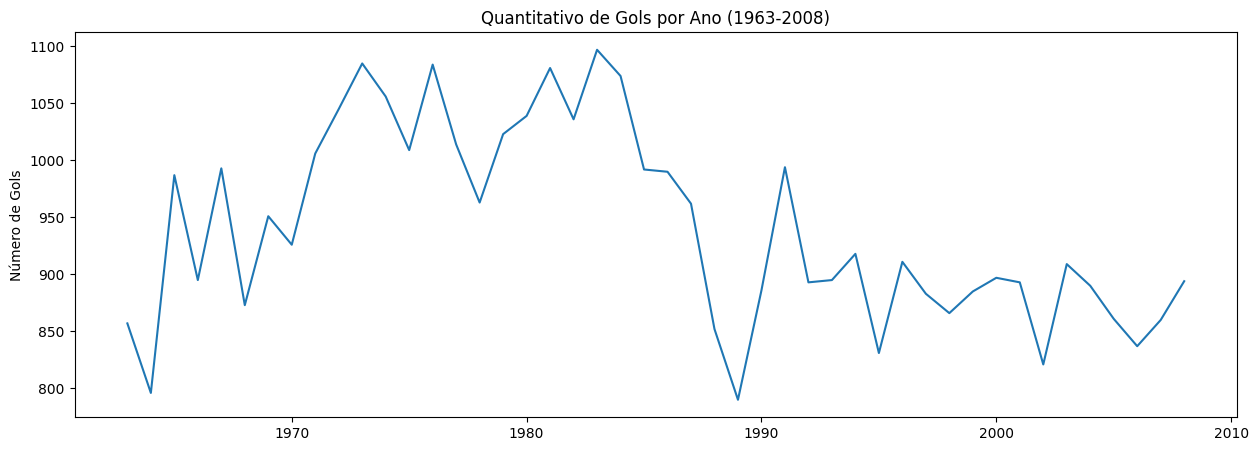

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df_ano['Year'], df_ano['Goals'])
plt.title('Quantitativo de Gols por Ano (1963-2008)')
plt.ylabel('Número de Gols')
plt.show

In [ ]:
df_mes=df_futebol.groupby('Month', as_index=False)['TotalGoals'].sum()
df_mes.columns=['Month','Goals']
df_mes

,Month,Goals
0,April,5057
1,August,4041
2,December,2682
3,February,3587
4,January,1708
5,July,84
6,June,997
7,March,5150
8,May,4607
9,November,4966


<ipython-input-43-5f3679e89343>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Goals', y='Month', data=df_mes, palette = "Blues_d")


<function matplotlib.pyplot.show(close=None, block=None)>

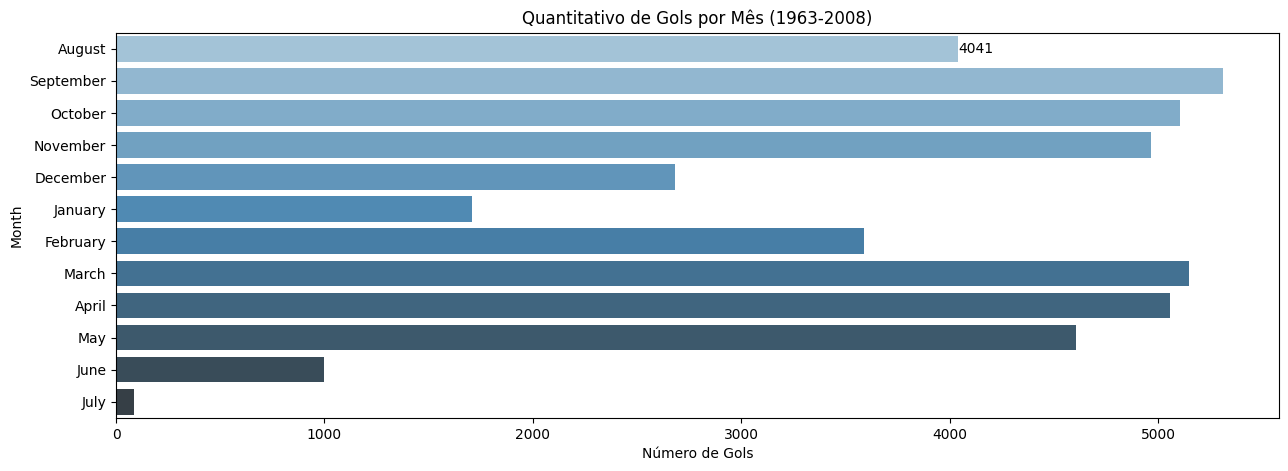

In [ ]:
plt.figure(figsize = (15,5))
ordem_mes=pd.CategoricalDtype(categories=['August','September','October','November','December','January',
                                          'February','March','April','May','June','July'],
                              ordered=True)

df_mes['Month']=df_mes['Month'].astype(ordem_mes)
ax = sns.barplot(x = 'Goals', y='Month', data=df_mes, palette = "Blues_d")
ax.bar_label(ax.containers[0])
plt.title('Quantitativo de Gols por Mês (1963-2008)')
plt.xlabel('Número de Gols')
plt.show

#### A temporada começa no início de agosto e dura até o final de maio do ano seguinte, com uma pausa de inverno de seis semanas (meados de dezembro até o final de janeiro). No entanto, observa-se registros de partidas nos dados analisados nos meses de junho e julho.

In [ ]:
# Observa-se registros de 314 partidas entre os meses de Junho e Julho
df_futebol[df_futebol['Month'].isin(['June','July'])].shape[0]

314

### 3. Conclusão

A Bundesliga é a primeira liga de futebol profissional da Alemanha, e é considerada a principal competição desportiva do país.

O primeiro jogo da Bundesliga foi em 24 de agosto de 1963.

Os dados analisados apresentam partidas que aconteceram entre 1963 e 2008.

A temporada começa no início de agosto e dura até o final de maio do ano seguinte, com uma pausa de inverno de seis semanas (meados de dezembro até o final de janeiro). No entanto, observa-se registros de partidas nos dados analisados nos meses de junho e julho.

Setembro foi o mês com maior número de gols da história da Bundesliga, dentre os dados disponíveis.

A maior goleada da história da Bundesliga foi do Borussia Monchengladbach, em 29 de abril de 1978, 12 a 0 contra o Borussia Dortmund. No entanto, em outros quatro jogos ocorreu o total de 12 gols em uma mesma partida.

Abaixo é possível visualizar os 20 (vinte) jogos com maior quantidade de gols na história da Bundesliga.

In [ ]:
df_futebol[['HomeTeam','AwayTeam','TotalGoals','HomeGoals','AwayGoals','Date']].sort_values(['TotalGoals','HomeGoals'],
                                                                            ascending=[False,False]).set_index('HomeTeam').head(20)

,index,HomeTeam,AwayTeam,TotalGoals,HomeGoals,AwayGoals,Date
0,4457,Borussia Moenchengladbach,Borussia Dortmund,12,12,0,1978-04-29
1,2456,Bayern Muenchen,Borussia Dortmund,12,11,1,1971-11-27
2,5788,Borussia Dortmund,Arminia Bielefeld,12,11,1,1982-11-06
3,81,Borussia Dortmund,1. FC Kaiserslautern,12,9,3,1963-11-16
4,4052,1. FC Koeln,Tennis Borussia Berlin,12,8,4,1977-02-26
5,944,Borussia Moenchengladbach,Schalke 04,11,11,0,1967-01-07
6,183,TSV 1860 Muenchen,Hamburger SV,11,9,2,1964-03-07
7,5500,Eintracht Frankfurt,Werder Bremen,11,9,2,1981-11-14
8,699,Borussia Moenchengladbach,1. FC Nuernberg,11,8,3,1966-03-12
9,3030,1. FC Kaiserslautern,Bayern Muenchen,11,7,4,1973-10-20
